# Customer Acquisition: Logit

A car dealership wants to estimate the effectiveness of its marketing campaign to acquire new customers. The dealer purchased 10,000 names and addresses of neighborhood habitants from JD Power. After using various marketing tools for 6 months, the dealer measured whether they became its customer or not.

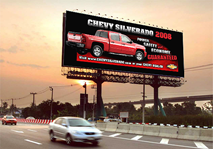
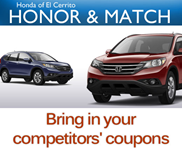

### Use “JDPower data.csv”. 
- Customer: 1 for acquired and 0 otherwise
- Billboard: Expected number of times the household saw the billboard in an average month
- Email: Types of email sent
    - 0: None
    - 1: Email promoting service quality
    - 2: Email promoting low prices
- Coupon: Dummy Variable (Sent / Not Sent)
- Distance: Distance from the dealer in miles

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### 1. Create three dummy variables from “Email”.

In [2]:
df = pd.read_csv('JDPower.csv')
df.head()

,id,customer,billboard,email,coupon,distance
0,1,0,40.27,0,0,2.17
1,2,0,47.55,1,1,1.66
2,3,0,50.87,1,0,2.14
3,4,0,49.71,2,1,1.93
4,5,0,54.20,2,1,1.84


In [3]:
df = pd.get_dummies(df, columns=['email'])  
 # drop_first=True: first category dummy will be removed
df.head()

,id,customer,billboard,coupon,distance,email_0,email_1,email_2
0,1,0,40.27,0,2.17,1,0,0
1,2,0,47.55,1,1.66,0,1,0
2,3,0,50.87,0,2.14,0,1,0
3,4,0,49.71,1,1.93,0,0,1
4,5,0,54.20,1,1.84,0,0,1


In [4]:
df=df.rename(columns={'email_0': 'none', 'email_1': 'qual', 'email_2': 'price'})
df.head()

,id,customer,billboard,coupon,distance,none,qual,price
0,1,0,40.27,0,2.17,1,0,0
1,2,0,47.55,1,1.66,0,1,0
2,3,0,50.87,0,2.14,0,1,0
3,4,0,49.71,1,1.93,0,0,1
4,5,0,54.20,1,1.84,0,0,1


### 2. Compare the mean of Billboard, Coupon, and Distance between customers and non-customers.

In [5]:
df.groupby('customer')[['billboard', 'coupon', 'distance']].mean()

,billboard,coupon,distance
customer,,,
0,49.155181,0.506024,2.039518
1,53.330000,0.941176,1.808824


### 3. Run the following logistic regression using 70% of the data as a train set (Use random_state=10).

**Customer = β0 + β1 Billboard + β2 Coupon + β3 Quality Email + β4 Price Email + β5 Distance + e**

In [6]:
y=df.customer
x=df[['billboard', 'coupon', 'distance', 'qual', 'price']]

xtrain, xtest, ytrain, ytest=train_test_split(x, y, random_state=10, train_size=0.7)
 # default: 75%,25% split
len(xtrain)

7000

- Logistic regression with the "training" sample using sklearn.linear_model (i.e., LogisticRegression) </br>
Outputs saved in 'm' will be used for prediction.

In [7]:
m = LogisticRegression().fit(xtrain, ytrain) 
 # Increase max_iter if it fails to converge
 # Default: solver='lbfgs',max_iter=100

In [8]:
m.n_iter_  # Number of actual iterations

array([68])

- Logistic regression with the "training" sample using statsmodels.api (i.e., sm.Logit) </br>
Outputs saved in 'm2' will be used for display.

In [9]:
import statsmodels.api as sm

m2=sm.Logit(ytrain, sm.add_constant(xtrain)).fit()
 # add_constant: add intercept to the model
m2.summary()

Optimization terminated successfully.
         Current function value: 0.295079
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               customer   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6994
Method:                           MLE   Df Model:                            5
Date:                Tue, 28 Nov 2023   Pseudo R-squ.:                  0.3559
Time:                        09:29:19   Log-Likelihood:                -2065.6
converged:                       True   LL-Null:                       -3207.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9837      0.536      5.561      0.000       1.932       4.035
billboard      0.0838      0.006     15.175      0.000       0.073       0.095
coupon         2.2918      0.136     16.849      0.000       2.025       2.558
distance      -5.9068      0.244    -24.196      0.000      -6.385      -5.428
qual           1.0658      0.110      9.676      0.000       0.850       1.282
price          0.9958      0.115      8.674      0.000       0.771       1.221
==============================================================================
"""

### 4. Interpret statistically significant coefficient. (Use 5% significance level)

- Billboard ad positively affects the probability of becoming a customer.
- Coupons are associated with a higher probability of becoming a customer.
- Distance from the delear negatively affects the probability of becoming a customer.
- Email messages containing service quality information positively affect the probability of becoming a customer.
- Email messages containing price promotion positively affect the probability of becoming a customer.

### 5. What is the percentage of correct predictions by the model for the test data?

In [10]:
pred=m.predict(xtest)
pred  # numpy array

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
accuracy_score(ytest, pred)

0.9236666666666666

### 6. Predict the probability of becoming a customer for the test data. Combine test data with predicted probabilities.

In [12]:
m.predict_proba(xtest)  # numpy array

array([[0.95102404, 0.04897596],
       [0.98533859, 0.01466141],
       [0.9246842 , 0.0753158 ],
       ...,
       [0.69794286, 0.30205714],
       [0.93794424, 0.06205576],
       [0.62939232, 0.37060768]])

In [13]:
prob=pd.DataFrame(m.predict_proba(xtest))  # Save as dataframe
prob.head()

,0,1
0,0.951024,0.048976
1,0.985339,0.014661
2,0.924684,0.075316
3,0.998204,0.001796
4,0.915696,0.084304


In [14]:
prob=prob.rename(columns={0:'pred_0', 1:'pred_1'})
prob

,pred_0,pred_1
0,0.951024,0.048976
1,0.985339,0.014661
2,0.924684,0.075316
3,0.998204,0.001796
4,0.915696,0.084304
...,...,...
2995,0.996900,0.003100
2996,0.930898,0.069102
2997,0.697943,0.302057
2998,0.937944,0.062056


In [15]:
# Need to match index to combine ytest, xtest, prob

xtest  # index deos not start from 0 due to random sampling

,billboard,coupon,distance,qual,price
937,44.68,1,2.23,1,0
9355,37.85,0,1.93,0,1
2293,48.90,1,2.21,1,0
192,40.27,0,2.17,0,0
8675,46.99,1,2.16,1,0
...,...,...,...,...,...
4964,50.33,0,2.22,0,0
8978,58.64,1,2.18,0,0
7540,60.81,1,2.07,0,1
5275,65.10,0,1.89,0,0


In [16]:
# reset index to 0~2999

ytest.reset_index(drop=True, inplace=True) 
xtest.reset_index(drop=True, inplace=True) 
 # inplace=True: Modify dataframe
 # drop=True: Do not insert index into dataframe columns

xtest  # index starts from 0 now

,billboard,coupon,distance,qual,price
0,44.68,1,2.23,1,0
1,37.85,0,1.93,0,1
2,48.90,1,2.21,1,0
3,40.27,0,2.17,0,0
4,46.99,1,2.16,1,0
...,...,...,...,...,...
2995,50.33,0,2.22,0,0
2996,58.64,1,2.18,0,0
2997,60.81,1,2.07,0,1
2998,65.10,0,1.89,0,0


In [17]:
df1=pd.concat([ytest, xtest, prob], axis=1)
df1

,customer,billboard,coupon,distance,qual,price,pred_0,pred_1
0,0,44.68,1,2.23,1,0,0.951024,0.048976
1,0,37.85,0,1.93,0,1,0.985339,0.014661
2,0,48.90,1,2.21,1,0,0.924684,0.075316
3,0,40.27,0,2.17,0,0,0.998204,0.001796
4,0,46.99,1,2.16,1,0,0.915696,0.084304
...,...,...,...,...,...,...,...,...
2995,0,50.33,0,2.22,0,0,0.996900,0.003100
2996,0,58.64,1,2.18,0,0,0.930898,0.069102
2997,0,60.81,1,2.07,0,1,0.697943,0.302057
2998,0,65.10,0,1.89,0,0,0.937944,0.062056


### 7. (Random mailing) How many people can you expect to become customers from a random 20% mailing to the test data?

In [18]:
print(len(ytest))  # test data size
sum(ytest)  # sum of ones in ytest

3000


500

In [19]:
print(500/3000)  # % of customer
600*0.167  # We expect the same % of people will be customer in random sampling

0.16666666666666666


100.2

### 8. (Data science approach) You want to target top 20% of customers in the test data in terms of predicted probabilities by the logit model. What would be the conversion rate (i.e., becoming customers) from the top 20% people?

In [20]:
# Sort by descending order of prob

df1=df1.sort_values(by='pred_1', ascending=False)
df1

,customer,billboard,coupon,distance,qual,price,pred_0,pred_1
1935,1,60.16,1,1.38,0,1,0.049031,0.950969
68,1,60.16,1,1.38,0,1,0.049031,0.950969
1802,1,60.16,1,1.38,0,1,0.049031,0.950969
1807,1,60.16,1,1.38,0,1,0.049031,0.950969
2206,1,60.16,1,1.38,0,1,0.049031,0.950969
...,...,...,...,...,...,...,...,...
1474,0,34.14,0,2.25,0,0,0.999305,0.000695
1085,0,34.14,0,2.25,0,0,0.999305,0.000695
2569,0,34.14,0,2.25,0,0,0.999305,0.000695
88,0,34.14,0,2.25,0,0,0.999305,0.000695


In [21]:
# number of customers in top 20%

sum(df1[0:600].customer)  # 0~599

367

In [22]:
367/600  # hit rate

0.6116666666666667